We installed kedro-datasets[pandas] before starting because data exploration is outside kedro framework

In [9]:
#%pip install kedro-datasets[pandas]


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


we then defined our datasets in conf->base->catalog

In [1]:
%reload_ext kedro.ipython

[01/06/26 10:14:27] INFO     Using 'c:\Users\Pratishtha                                             __init__.py:270
                             Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\kedro\f                
                             ramework\project\rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: c:\Users\Pratishtha                          __init__.py:180
                             Singh\OneDrive\Desktop\Projects\Ai Art critic\ai-art-critic.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/06/26 10:14:30] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:243
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[01/06/26 10:14:31] INFO     Kedro project Ai_Art_Critic                                            __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

In [2]:
catalog


'Artemis': kedro_datasets.pandas.csv_dataset.CSVDataset
'WikiArt': kedro_datasets.pandas.csv_dataset.CSVDataset
'MetMuseum': kedro_datasets.pandas.csv_dataset.CSVDataset
'unified_art_dataset': kedro_datasets.pandas.csv_dataset.CSVDataset
'huggingface_dataset': ai_art_critic.datasets.huggingface_dataset.HuggingFaceDataset
'parameters': kedro.io.memory_dataset.MemoryDataset(data='<dict>')

It loads the dataset as pandas dataframe.

In [28]:
artemis=catalog.load("Artemis")
artemis.head()

[10/27/25 21:39:06] INFO     Loading data from Artemis (CSVDataset)...                         data_catalog.py:1046

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10


In [29]:
artemis.dtypes


art_style     object
painting      object
emotion       object
utterance     object
repetition     int64
dtype: object

In [30]:
wikiArt=catalog.load("WikiArt")
wikiArt.head()

[10/27/25 21:39:08] INFO     Loading data from WikiArt (CSVDataset)...                         data_catalog.py:1046

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train


In [31]:
wikiArt.dtypes


filename       object
artist         object
genre          object
description    object
phash          object
width           int64
height          int64
genre_count     int64
subset         object
dtype: object

In [32]:
met=catalog.load("MetMuseum")
met.head()

                    INFO     Loading data from MetMuseum (CSVDataset)...                       data_catalog.py:1046

[10/27/25 21:39:14] WARNING  c:\Users\Pratishtha                                                    warnings.py:109
                             Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\kedro_d                
                             atasets\pandas\csv_dataset.py:166: DtypeWarning: Columns                              
                             (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types.                
                             Specify dtype option on import or set low_memory=False.                               
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


In [34]:
met.dtypes


Object Number              object
Is Highlight                 bool
Is Public Domain             bool
Object ID                   int64
Department                 object
Object Name                object
Title                      object
Culture                    object
Period                     object
Dynasty                    object
Reign                      object
Portfolio                  object
Artist Role                object
Artist Prefix              object
Artist Display Name        object
Artist Display Bio         object
Artist Suffix              object
Artist Alpha Sort          object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Date                object
Object Begin Date           int64
Object End Date             int64
Medium                     object
Dimensions                 object
Credit Line                object
Geography Type             object
City                       object
State        

In [44]:
unified_art_dataset=catalog.load("unified_art_dataset")

[10/28/25 17:41:56] INFO     Loading data from unified_art_dataset (CSVDataset)...             data_catalog.py:1046

In [45]:
unified_art_dataset.head()

,id,image_name,artist,genre,title,phash,width,height,genre_count,subset,base_filename,style,painting,emotion,utterance,repetition,dataset_source,emotion_text,year
0,1,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,aaron-siskind_acolman-1-1955,contentment,I like the woods and as this looks like a grav...,5.0,WikiArt_ArtEmis,I like the woods and as this looks like a grav...,NaN
1,2,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear,Lost in a city and finding myself in a bad are...,5.0,WikiArt_ArtEmis,Lost in a city and finding myself in a bad are...,NaN
2,3,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,aaron-siskind_acolman-1-1955,something else,the forest and trees is reprsented in a dark a...,5.0,WikiArt_ArtEmis,the forest and trees is reprsented in a dark a...,NaN
3,4,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,aaron-siskind_acolman-1-1955,amusement,interesting to figure out how specific those s...,5.0,WikiArt_ArtEmis,interesting to figure out how specific those s...,NaN
4,5,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear,Because the black & white overtones and the ob...,5.0,WikiArt_ArtEmis,Because the black & white overtones and the ob...,NaN


In [46]:
# Basic dataset information
print("Dataset Shape:", unified_art_dataset.shape)
print("\nColumns:", list(unified_art_dataset.columns))
print("\nData Types:")
print(unified_art_dataset.dtypes)

Dataset Shape: (451685, 19)

Columns: ['id', 'image_name', 'artist', 'genre', 'title', 'phash', 'width', 'height', 'genre_count', 'subset', 'base_filename', 'style', 'painting', 'emotion', 'utterance', 'repetition', 'dataset_source', 'emotion_text', 'year']

Data Types:
id                  int64
image_name         object
artist             object
genre              object
title              object
phash              object
width               int64
height              int64
genre_count         int64
subset             object
base_filename      object
style              object
painting           object
emotion            object
utterance          object
repetition        float64
dataset_source     object
emotion_text       object
year              float64
dtype: object


In [47]:
# Check for missing values
print("Missing Values:")
print(unified_art_dataset.isnull().sum())

# Check emotion distribution
print("\nEmotion Distribution:")
print(unified_art_dataset['emotion'].value_counts().head(10))

# Check dataset source distribution
print("\nDataset Source Distribution:")
print(unified_art_dataset['dataset_source'].value_counts())

Missing Values:
id                     0
image_name             0
artist                 0
genre                  0
title                  0
phash                  0
width                  0
height                 0
genre_count            0
subset                 0
base_filename          0
style                  0
painting             634
emotion              634
utterance            634
repetition           634
dataset_source         0
emotion_text         634
year              451685
dtype: int64

Emotion Distribution:
emotion
contentment       125126
awe                72425
something else     52538
sadness            48692
amusement          44995
fear               41130
excitement         37337
disgust            22221
anger               6587
Name: count, dtype: int64

Dataset Source Distribution:
dataset_source
WikiArt_ArtEmis    451685
Name: count, dtype: int64


In [52]:
unified_art_dataset.drop(columns=['year'], inplace=True)

painting and filename have same content

In [55]:
unified_art_dataset.drop(columns=['painting'], inplace=True)

In [56]:
unified_art_dataset.isnull().sum()


id                  0
image_name          0
artist              0
genre               0
title               0
phash               0
width               0
height              0
genre_count         0
subset              0
base_filename       0
style               0
emotion           634
utterance         634
repetition        634
dataset_source      0
emotion_text      634
dtype: int64

In [58]:
# Remove rows where emotion, utterance, repetition, and emotion_text are all NaN
print("Before cleaning - Dataset shape:", unified_art_dataset.shape)

# Check which rows have all emotion-related columns as NaN
emotion_cols = ['emotion', 'utterance', 'repetition', 'emotion_text']
rows_to_remove = unified_art_dataset[emotion_cols].isnull().all(axis=1)

print(f"Rows to remove (all emotion columns NaN): {rows_to_remove.sum()}")

# Remove these rows
unified_art_dataset_clean = unified_art_dataset[~rows_to_remove].copy()

print("After cleaning - Dataset shape:", unified_art_dataset_clean.shape)
print(f"Removed {rows_to_remove.sum()} rows")

# Verify the cleaning worked
print("\nRemaining missing values in emotion columns:")
print(unified_art_dataset_clean[emotion_cols].isnull().sum())

Before cleaning - Dataset shape: (451685, 17)
Rows to remove (all emotion columns NaN): 634
After cleaning - Dataset shape: (451051, 17)
Removed 634 rows

Remaining missing values in emotion columns:
emotion         0
utterance       0
repetition      0
emotion_text    0
dtype: int64
After cleaning - Dataset shape: (451051, 17)
Removed 634 rows

Remaining missing values in emotion columns:
emotion         0
utterance       0
repetition      0
emotion_text    0
dtype: int64


In [59]:
# Update the main dataset variable
unified_art_dataset = unified_art_dataset_clean.copy()

print("Dataset cleaned! Updated unified_art_dataset variable.")
print(f"Final shape: {unified_art_dataset.shape}")

# Quick verification
print("\nEmotion distribution after cleaning:")
print(unified_art_dataset['emotion'].value_counts().head(5))

Dataset cleaned! Updated unified_art_dataset variable.
Final shape: (451051, 17)

Emotion distribution after cleaning:
emotion
contentment       125126
awe                72425
something else     52538
sadness            48692
amusement          44995
Name: count, dtype: int64


In [60]:
unified_art_dataset.isnull().sum()


id                0
image_name        0
artist            0
genre             0
title             0
phash             0
width             0
height            0
genre_count       0
subset            0
base_filename     0
style             0
emotion           0
utterance         0
repetition        0
dataset_source    0
emotion_text      0
dtype: int64

In [65]:
# Check unique values in subset column
print("Subset column unique value counts:")
print(unified_art_dataset['subset'].value_counts())

print(f"\nTotal unique subsets: {unified_art_dataset['subset'].nunique()}")

# Check subset distribution by percentage
print("\nSubset distribution (percentage):")
subset_pct = unified_art_dataset['subset'].value_counts(normalize=True) * 100
print(subset_pct.round(2))

Subset column unique value counts:
subset
train               360650
test                 90173
uncertain artist       228
Name: count, dtype: int64

Total unique subsets: 3

Subset distribution (percentage):
subset
train               79.96
test                19.99
uncertain artist     0.05
Name: proportion, dtype: float64


In [66]:
# Drop rows where subset = "uncertain artist"
print("Before filtering - Dataset shape:", unified_art_dataset.shape)

# Count rows with "uncertain artist" subset
uncertain_count = (unified_art_dataset['subset'] == 'uncertain artist').sum()
print(f"Rows with 'uncertain artist' subset: {uncertain_count}")

# Filter out these rows
unified_art_dataset = unified_art_dataset[unified_art_dataset['subset'] != 'uncertain artist'].copy()

print("After filtering - Dataset shape:", unified_art_dataset.shape)
print(f"Removed {uncertain_count} rows with 'uncertain artist' subset")

# Verify the filtering worked
remaining_uncertain = (unified_art_dataset['subset'] == 'uncertain artist').sum()
print(f"Remaining 'uncertain artist' rows: {remaining_uncertain}")

# Show updated subset distribution
print("\nUpdated subset distribution:")
print(unified_art_dataset['subset'].value_counts())

Before filtering - Dataset shape: (451051, 17)
Rows with 'uncertain artist' subset: 228
After filtering - Dataset shape: (450823, 17)
Removed 228 rows with 'uncertain artist' subset
Remaining 'uncertain artist' rows: 0

Updated subset distribution:
subset
train    360650
test      90173
Name: count, dtype: int64
After filtering - Dataset shape: (450823, 17)
Removed 228 rows with 'uncertain artist' subset
Remaining 'uncertain artist' rows: 0

Updated subset distribution:
subset
train    360650
test      90173
Name: count, dtype: int64


The repetition column indicates how many times that specific (painting, emotion, utterance) combination appeared in the annotation set.

In other words:

If multiple annotators wrote the same or nearly identical utterance for the same image/emotion, the dataset keeps only one copy of that record but sets repetition to the number of times it was repeated.

5 annotators independently said something like “It feels vast and infinite.”
So, instead of 5 separate rows, you get one row with repetition=5.

In [72]:
# Check rows where repetition >= 2
print("Rows where repetition >= 2:")
high_repetition = unified_art_dataset[unified_art_dataset['repetition'] >= 2]
print(f"Number of rows with repetition >= 2: {len(high_repetition)}")

if len(high_repetition) > 0:
    print("\nRepetition value counts (>= 2):")
    print(high_repetition['repetition'].value_counts().sort_index())

    print("\nSample of rows with repetition >= 2:")
    print(high_repetition[['artist', 'title', 'emotion', 'repetition']].head(10))

    # Check if these are duplicates
    print(f"\nAre there duplicate emotion-text combinations? {high_repetition.duplicated(subset=['emotion_text']).any()}")

else:
    print("No rows found with repetition >= 2")

# Overall repetition distribution
print("\nOverall repetition distribution:")
print(unified_art_dataset['repetition'].value_counts().sort_index())

Rows where repetition >= 2:
Number of rows with repetition >= 2: 450823

Repetition value counts (>= 2):
repetition
5.0     305535
6.0      93198
7.0       4606
8.0        240
9.0          9
10.0      8030
11.0      5192
12.0       900
13.0        78
41.0        41
42.0       126
43.0       473
44.0      2552
45.0      5670
46.0      5980
47.0      2538
48.0      3648
49.0      3283
50.0      3300
51.0      2601
52.0      1092
53.0       848
54.0       378
55.0       165
56.0       224
58.0       116
Name: count, dtype: int64

Sample of rows with repetition >= 2:
          artist           title         emotion  repetition
0  aaron siskind  acolman-1-1955     contentment         5.0
1  aaron siskind  acolman-1-1955            fear         5.0
2  aaron siskind  acolman-1-1955  something else         5.0
3  aaron siskind  acolman-1-1955       amusement         5.0
4  aaron siskind  acolman-1-1955            fear         5.0
5  aaron siskind  chicago-6-1961            fear         5.0
6  

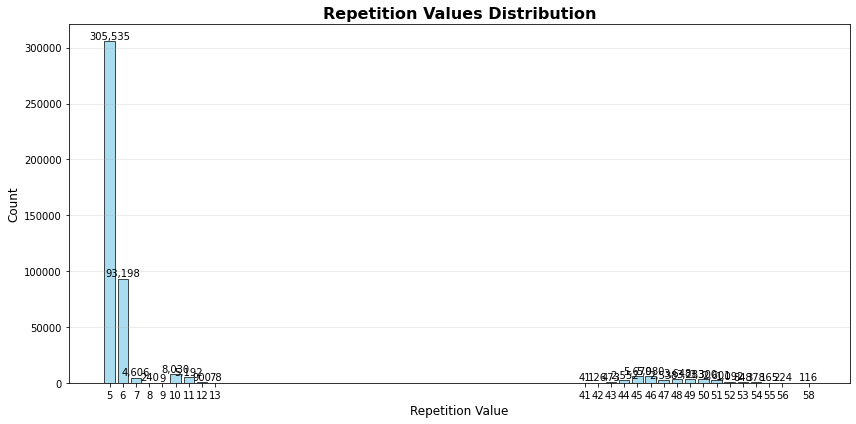

Repetition Statistics:
Total rows: 450823
Unique repetition values: 26
Min repetition: 5.0
Max repetition: 58.0
Mean repetition: 8.53
Median repetition: 5.0


In [74]:
# Graph for repetition values and counts
import matplotlib.pyplot as plt

# Get repetition value counts
repetition_counts = unified_art_dataset['repetition'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(repetition_counts.index, repetition_counts.values, color='skyblue', edgecolor='black', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.title('Repetition Values Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Repetition Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Set x-ticks to show all repetition values
plt.xticks(repetition_counts.index)

plt.tight_layout()
plt.show()

# Summary statistics for repetition
print("Repetition Statistics:")
print(f"Total rows: {len(unified_art_dataset)}")
print(f"Unique repetition values: {unified_art_dataset['repetition'].nunique()}")
print(f"Min repetition: {unified_art_dataset['repetition'].min()}")
print(f"Max repetition: {unified_art_dataset['repetition'].max()}")
print(f"Mean repetition: {unified_art_dataset['repetition'].mean():.2f}")
print(f"Median repetition: {unified_art_dataset['repetition'].median()}")



1. The dataset was collected in fixed annotation batches

The ArtEmis creators (Mohammad Soleymani et al., 2021) ran annotation tasks on Amazon Mechanical Turk (MTurk).

Each artwork was annotated by a fixed number of people, typically:

5–12 annotators per image for common artworks.

40–60 annotators for a smaller subset used for validation and reliability studies.

That’s why you see:

Repetitions clustering around 5–12 (normal batch size).

Then another cluster around 41–58 (special reliability batches).

There were no tasks that had 13–40 annotators, hence the gap.

phash = Perceptual Hash

It’s a compact fingerprint of an image’s visual content, designed so that similar-looking images have similar hashes, even if the files themselves differ (e.g., resized, cropped, or compressed).


Imagine two images:

The original Mona Lisa

A resized or color-tweaked version of Mona Lisa

Their file bytes are totally different…
but their visual appearance is almost identical.

A perceptual hash (pHash) captures that similarity by converting an image into a short string (or hexadecimal number) that encodes its visual pattern — not its pixel data.


How pHash works (conceptually)

Convert image to grayscale

Resize to a small fixed grid (e.g., 32×32 pixels)

Apply a Discrete Cosine Transform (DCT) to extract overall structure

Take only the low-frequency components (general patterns, not details)

Convert to binary values — 1s for above-average brightness, 0s for below

Encode that bit pattern as a hexadecimal string → the pHash

In [76]:
# Count unique values in genre_count column
print("Genre Count column unique value counts:")
genre_count_values = unified_art_dataset['genre_count'].value_counts().sort_index()
print(genre_count_values)

print(f"\nTotal unique genre_count values: {unified_art_dataset['genre_count'].nunique()}")
print(f"Most common genre_count: {unified_art_dataset['genre_count'].mode().iloc[0]}")

# Show as percentages
print("\nGenre Count distribution (percentage):")
genre_count_pct = unified_art_dataset['genre_count'].value_counts(normalize=True).sort_index() * 100
print(genre_count_pct.round(2))


Genre Count column unique value counts:
genre_count
1    435984
2     14833
3         6
Name: count, dtype: int64

Total unique genre_count values: 3
Most common genre_count: 1

Genre Count distribution (percentage):
genre_count
1    96.71
2     3.29
3     0.00
Name: proportion, dtype: float64


each artwork is tagged with one or more genres — such as:

Portrait

Landscape

Religious painting

Abstract

Still life, etc.

The genre_count column simply tells you how many genre labels are assigned to a given painting.

In [71]:
unified_art_dataset.head()

,id,image_name,artist,genre,title,phash,width,height,genre_count,subset,base_filename,style,emotion,utterance,repetition,dataset_source,emotion_text
0,1,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,contentment,I like the woods and as this looks like a grav...,5.0,WikiArt_ArtEmis,I like the woods and as this looks like a grav...
1,2,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,fear,Lost in a city and finding myself in a bad are...,5.0,WikiArt_ArtEmis,Lost in a city and finding myself in a bad are...
2,3,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,something else,the forest and trees is reprsented in a dark a...,5.0,WikiArt_ArtEmis,the forest and trees is reprsented in a dark a...
3,4,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,amusement,interesting to figure out how specific those s...,5.0,WikiArt_ArtEmis,interesting to figure out how specific those s...
4,5,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,aaron-siskind_acolman-1-1955,Abstract_Expressionism,fear,Because the black & white overtones and the ob...,5.0,WikiArt_ArtEmis,Because the black & white overtones and the ob...


In [77]:
# Top artists
print("Top 10 Artists:")
print(unified_art_dataset['artist'].value_counts().head(10))

# Art styles distribution
print("\nTop 10 Art Styles:")
print(unified_art_dataset['style'].value_counts().head(10))



Top 10 Artists:
artist
nicholas roerich         10591
vincent van gogh         10292
pierre auguste renoir     7774
claude monet              7668
pyotr konchalovsky        5549
camille pissarro          5041
albrecht durer            4623
gustave dore              4356
pablo picasso             4332
rembrandt                 4306
Name: count, dtype: int64

Top 10 Art Styles:
style
Impressionism             71753
Realism                   59127
Romanticism               38632
Expressionism             38073
Post_Impressionism        36298
Art_Nouveau_Modern        24320
Symbolism                 24082
Baroque                   23439
Abstract_Expressionism    16080
Northern_Renaissance      14135
Name: count, dtype: int64


In [78]:
# Genres distribution
print("\nTop 10 Genres:")
print(unified_art_dataset['genre'].value_counts().head(10))


Top 10 Genres:
genre
['Impressionism']             71654
['Realism']                   57127
['Romanticism']               38601
['Post Impressionism']        34653
['Expressionism']             34024
['Symbolism']                 23481
['Art Nouveau Modern']        23132
['Baroque']                   23013
['Abstract Expressionism']    14798
['Northern Renaissance']      14135
Name: count, dtype: int64


In [69]:
# Sample emotion texts
print("Sample Emotion Texts:")
for i, row in unified_art_dataset[unified_art_dataset['emotion_text'].notna()].head(5).iterrows():
    print(f"\nEmotion: {row['emotion']}")
    print(f"Text: {row['emotion_text']}")
    print(f"Artist: {row['artist']}, Title: {row['title']}")
    

Sample Emotion Texts:

Emotion: contentment
Text: I like the woods and as this looks like a graveyard, it soothes.
Artist: aaron siskind, Title: acolman-1-1955

Emotion: fear
Text: Lost in a city and finding myself in a bad area of abandoned buildings.
Artist: aaron siskind, Title: acolman-1-1955

Emotion: something else
Text: the forest and trees is reprsented in a dark and gloomy manner
Artist: aaron siskind, Title: acolman-1-1955

Emotion: amusement
Text: interesting to figure out how specific those shapes are made, super hard to tell
Artist: aaron siskind, Title: acolman-1-1955

Emotion: fear
Text: Because the black & white overtones and the objects that somewhat resemble headstones in a cemetery.
Artist: aaron siskind, Title: acolman-1-1955

Text: I like the woods and as this looks like a graveyard, it soothes.
Artist: aaron siskind, Title: acolman-1-1955

Emotion: fear
Text: Lost in a city and finding myself in a bad area of abandoned buildings.
Artist: aaron siskind, Title: acol

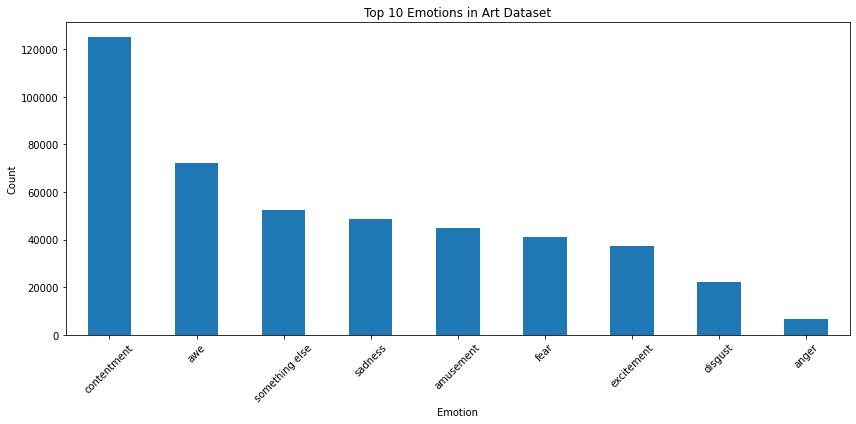


Dataset Summary:
Total artworks: 79381
Total emotion annotations: 450823
Artworks with emotions: 79381
Average emotions per artwork: 5.68


In [70]:
# Emotion distribution visualization
import matplotlib.pyplot as plt

emotion_counts = unified_art_dataset['emotion'].value_counts().head(10)
plt.figure(figsize=(12, 6))
emotion_counts.plot(kind='bar')
plt.title('Top 10 Emotions in Art Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nDataset Summary:")
print(f"Total artworks: {unified_art_dataset['image_name'].nunique()}")
print(f"Total emotion annotations: {len(unified_art_dataset)}")
print(f"Artworks with emotions: {unified_art_dataset[unified_art_dataset['emotion_text'].notna()]['image_name'].nunique()}")
print(f"Average emotions per artwork: {len(unified_art_dataset) / unified_art_dataset['image_name'].nunique():.2f}")

# Loading Datasets from Hugging Face Hub

To load your dataset from Hugging Face, you can use the custom HuggingFaceDataset class. Here's how:

## 1. Configure in catalog.yml

Add your dataset to `conf/base/catalog.yml`:

```yaml
my_huggingface_dataset:
  type: ai_art_critic.datasets.HuggingFaceDataset
  dataset: username/your-dataset-name
  split: train  # optional: train, test, validation, etc.
```

## 2. Load in your notebook

```python
%reload_ext kedro.ipython
catalog

# Load your Hugging Face dataset
hf_dataset = catalog.load("my_huggingface_dataset")
hf_dataset.head()
```

## 3. Direct loading (alternative)

You can also load directly using the datasets library:

```python
from datasets import load_dataset

# Load your dataset
dataset = load_dataset("username/your-dataset-name")
df = dataset['train'].to_pandas()  # Convert to pandas DataFrame
```

**Note:** Replace `username/your-dataset-name` with your actual Hugging Face dataset identifier.

In [3]:
hf_dataset = catalog.load("huggingface_dataset")
hf_dataset.head()

[01/06/26 10:14:41] INFO     Loading data from huggingface_dataset (HuggingFaceDataset)...     data_catalog.py:1046

Loading dataset: huggan/wikiart (10K<n<100K)
Loading first 5 files out of 5 total
Loading 5 parquet files...
Loading file 1/5: data/train-00000-of-00072.parquet
Sampled dataset to 1000 rows for memory efficiency
Successfully loaded dataset with 1000 rows and 4 columns


,image,artist,genre,style
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,22,4,21
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,20,7,4
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,16,6,20
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,17,2,12
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,9,10,23
